# Dimensionality Reduction & Visualization


In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting figures in the notebook
%matplotlib inline
# NOTE: you can also try 'notebook' or 'widget' in place of 'inline' (may require installing extra packages, but more functionality)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# load the iris dataset
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# note that the iris data is 4-dimensional
iris.data.shape

(150, 4)

In [4]:
# let's look at the first 10 elements
iris.data[:10]
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Plot the data
Since the iris dataset has 4 features, we'll need to plot them as pairs; we can use color to represent class label.  Here is an example of plotting the first two dimensions:

Text(0.5, 1.0, 'Iris dataset (first two dimensions)')

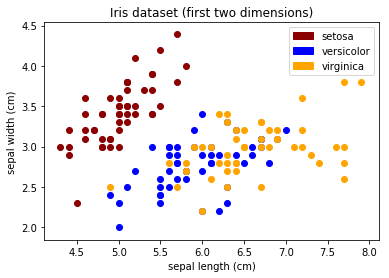

In [5]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][1]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (first two dimensions)')

# Plot the other combinations of axes
You will need a total of 6 plots (including the one above) to plot all possible combinations of dimensions; the remaining 5 are left to you, but you should be able to copy the example above and make minor modifications to it.

Text(0.5, 1.0, 'Iris dataset --first & third dimensions--')

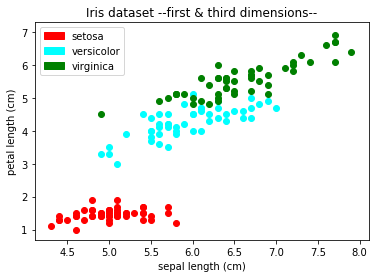

In [6]:
# todo: plot 2
plt.figure()

color = ['red', 'cyan', 'green']

for i in range(len(iris.data)):
    
    x = iris.data[i][0]
    y = iris.data[i][2]

    label = color[iris.target[i]]

    plt.scatter(x, y, color=label)
    
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

red = mpatches.Patch(color='red', label='setosa')
cyan = mpatches.Patch(color='cyan', label='versicolor')
green = mpatches.Patch(color='green', label='virginica')

plt.legend(handles=[red, cyan, green])

plt.title("Iris dataset --first & third dimensions--")

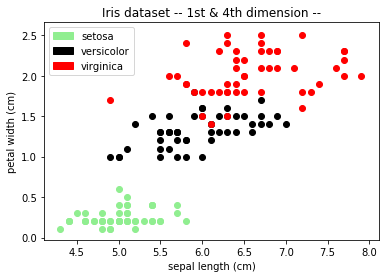

In [7]:
# todo: plot 3
plt.figure()

color = ['lightgreen', 'black', 'red']

for i in range(len(iris.data)):
    xlabel = iris.data[i][0]
    ylabel = iris.data[i][3]

    label = color[iris.target[i]]

    plt.scatter(xlabel, ylabel, color=label)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])

plt.title("Iris dataset -- 1st & 4th dimension --")

lightgreen = mpatches.Patch(color='lightgreen', label='setosa')
black = mpatches.Patch(color='black', label='versicolor')
red = mpatches.Patch(color='red', label='virginica')

plt.legend(handles=[lightgreen, black, red])

Text(0.5, 1.0, 'Iris Dataset --2nd and 3rd dimensions --')

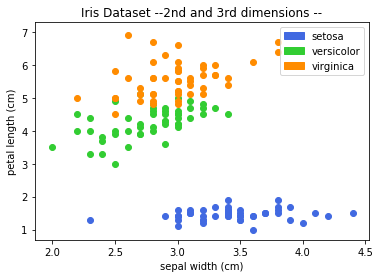

In [8]:
# todo: plot 4
colors = ['royalblue', 'limegreen', 'darkorange']

for i in range(len(iris.data)):
    
    x = iris.data[i][1]
    y = iris.data[i][2]
    
    c = colors[iris.target[i]]
    
    plt.scatter(x, y, color=c)
    
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
    
royalblue = mpatches.Patch(color='royalblue', label='setosa')
limegreen = mpatches.Patch(color='limegreen', label='versicolor')
darkorange= mpatches.Patch(color='darkorange', label='virginica')

plt.legend(handles=[royalblue, limegreen, darkorange])

plt.title('Iris Dataset --2nd and 3rd dimensions --')


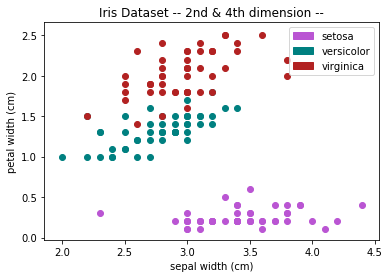

In [9]:
# todo: plot 5
plt.figure()
colors = ['mediumorchid','teal','firebrick']

for i in range(len(iris.data)):
    
    x = iris.data[i][1]
    y = iris.data[i][3]
    
    c = colors[iris.target[i]]
    
    plt.scatter(x, y, color=c)
    
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])

plt.title('Iris Dataset -- 2nd & 4th dimension --')

mediumorchid = mpatches.Patch(color='mediumorchid', label='setosa')
teal = mpatches.Patch(color='teal', label='versicolor')
firebrick = mpatches.Patch(color='firebrick', label='virginica')

plt.legend(handles=[mediumorchid, teal, firebrick])

Text(0.5, 1.0, 'Iris Dataset -- 3rd and 4th dimension --')

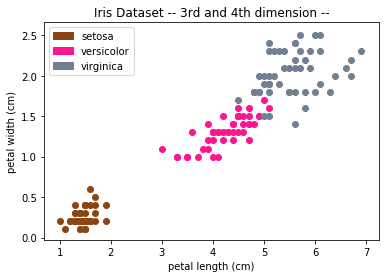

In [10]:
# todo: plot 6
plt.figure()
colors = ['saddlebrown', 'deeppink', 'slategrey']

for i in range(len(iris.data)):
    
    x = iris.data[i][2]
    y = iris.data[i][3]
    
    c = colors[iris.target[i]]
    
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

saddlebrown = mpatches.Patch(color='saddlebrown', label='setosa')
deeppink = mpatches.Patch(color='deeppink', label='versicolor')
slategrey = mpatches.Patch(color='slategrey', label='virginica')

plt.legend(handles=[saddlebrown, deeppink, slategrey])
plt.title('Iris Dataset -- 3rd and 4th dimension --')

## Run PCA
Here, we'll apply principal component analysis (PCA) to the dataset.  We'll use `n_components=2` to indicate we want to reduce our dimensionality to 2

In [11]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

In [12]:
# note that our transformed dat is now 2-dimensional
iris2d.shape

(150, 2)

In [13]:
# again, let's look at the first 10 elements; note that they are 2 dimensional, rather than 4
iris2d[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

### Examining components
We can look at the actual "principal components," which we're using as the basis for our transformed data space.  Since each component is a vector in the original data space, we can see what "axis" in the original space is the one of primary variance.

Since we said to use the top 2 components, we're going to have two vectors, each of length 4 (since our original data was 4 dimensional).

We can also show the amount of the total variance explained by each component, which tells us how "important" they are.

In [14]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

principal components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
percentage of variance explained by first 2 principal components: [0.92461872 0.05306648]


## Make a plot of the 2D "transformed" data
 First, here's an example adapted from http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

Text(0.5, 1.0, 'PCA of IRIS dataset')

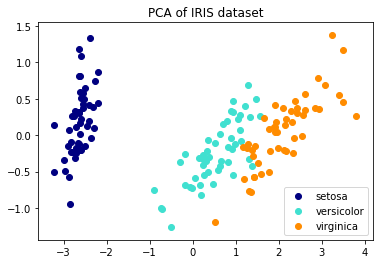

In [15]:
# make a new figure
plt.figure()
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris2d[iris.target == i, 0], iris2d[iris.target == i, 1], color=color, label=iris.target_name)
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')

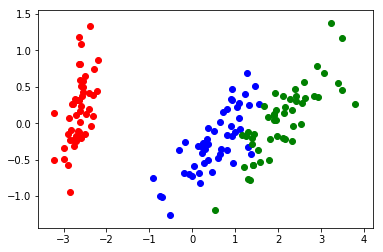

In [16]:
# here's an alternative version of plotting this data that may be easier to understand:
colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = iris2d[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])


These plots are better than before ones because we are able to separate the data points and form a clear visualization while also capturing most of the variance in the dataset. The pros of this method is that we don't need to create different number of plots by feature pairs in order to find out the best pair which helps us to label our data more accurately. PCA also captures most of the variance in our dataset which was not possible using only a pair of features of our dataset. 

The interpretability of our graph is reduced since we are using principal components instead of features on our x and y-axis which is one of the cons of using PCA. Also, even though PCA is able to capture most of the variance (>0.90), some amount of variance in the dataset is still left out.

## SciKit Learn has several other methods of generating embeddings
 Here, we're going to use t-SNE and see how it compares to PCA.

Note that t-SNE is stochastic, so re-running this cell will result in a different plot each time.

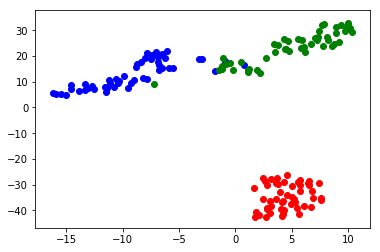

In [17]:
from sklearn import manifold

irisTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(iris.data)

colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = irisTSNE[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

# Now let's try a different dataset
Here, we'll work with a set of small "pictures" of handwritten numeric digits.  Note that this is a miniature version; most real-world image datasets are much bigger (both in dimensionality and number of examples), but the same principles will apply.

In [18]:
# load a dataset composed of small images of written numbers
digits = datasets.load_digits()

In [19]:
# let's take a look at the shape of the dataset
digits.data.shape

(1797, 64)

Note that each example has 64 features, which in this case represent values from a 8x8 pixel grayscale image

In [20]:
# let's look at a random example; note that it's just a single vector with 64 elements
print('label is :', digits.target[20])
digits.data[20]

label is : 0


array([ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
       16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
       16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
        0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
        9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.])

In [21]:
# note that we can 'reshape' this data to get an 8x8 2D array (i.e. matrix) with those values
mat = np.reshape(digits.data[20], [8,8])
mat

array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

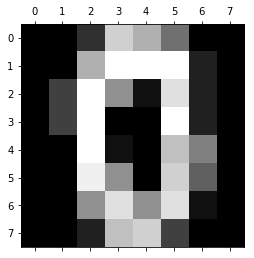

In [22]:
# we can also ask matplotlib to treat these examples as images (which they are), and plot one:
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

# Visualize this data
Note that we can't realistically visualize all pairs of axes, there's way too many (though we can look at example images as shown above).  However, we can still do PCA and do a scatterplot of the first two dimensions, which is what you should do next.  Note that there are now going to be 10 different classes (the digits 0 through 9), so you'll need to pick some more colors to give each class its own color.  Try to ensure that the colors are visually distinct; here's a link to some colored patches along with their CSS names (which pyplot will recognise) http://www.crockford.com/wrrrld/color.html

In [23]:
# TODO: run PCA on the digit data and project the dataset down to 2 dimensions
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(digits.data)
# transform our data using the learned transform
digits2d = eigenbasis.transform(digits.data)
digits2d.shape

digits2d[:10]

print("principal components of digits data:\n", pca.components_)

print('percentage of variance explained by first 2 principal components for digits data:', pca.explained_variance_ratio_)

pca.components_[0]
digits2d.shape

principal components of digits data:
 [[-2.35815584e-17 -1.73094674e-02 -2.23428844e-01 -1.35913297e-01
  -3.30323095e-02 -9.66340874e-02 -8.32943683e-03  2.26900155e-03
  -3.20516553e-04 -1.19308915e-01 -2.44451676e-01  1.48512757e-01
  -4.67319439e-02 -2.17740741e-01 -1.48136758e-02  4.47779563e-03
  -4.94136466e-05 -7.95419475e-02  8.33951475e-02  2.15915350e-01
  -1.72126801e-01 -1.63712099e-01  2.86444428e-02  4.23251799e-03
   9.85488610e-05  6.42319109e-02  2.54093307e-01 -3.56771017e-02
  -2.09462565e-01 -4.31311545e-02  5.13118634e-02  2.13422726e-04
  -0.00000000e+00  1.59950882e-01  3.68690770e-01  1.64406821e-01
   8.52007928e-02  3.72982858e-02  2.15866998e-02 -0.00000000e+00
   1.28865576e-03  1.06945286e-01  3.03067459e-01  2.47813026e-01
   2.09637291e-01  1.22325194e-02 -3.69458439e-02  1.61485047e-03
   6.93023498e-04 -8.35144372e-03 -5.58599003e-02  9.30534176e-02
   1.07387717e-01 -1.37734575e-01 -6.32879479e-02  9.61671448e-04
   9.55078908e-06 -1.40786861e-02 -2.3

(1797, 2)

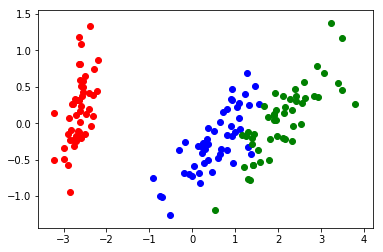

In [24]:
point = digits2d[0]
point

colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = iris2d[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

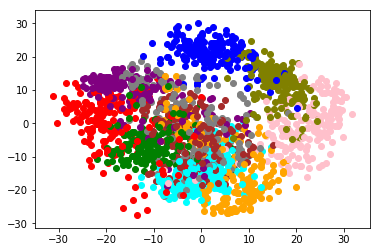

In [25]:
# TODO: make a scatterplot of the 2D version, using different colors for each class

colors = ['blue', 'orange', 'green', 'red', 'pink', 'gray', 'olive', 'cyan', 'brown', 'purple']

for i in range(len(digits2d)):
    
    point = digits2d[i]
    classLabel = digits.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel]) 

In [26]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

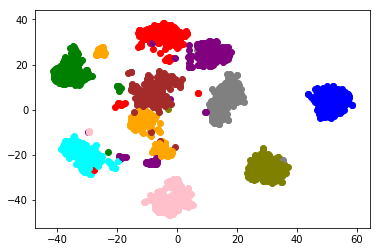

In [27]:
# TODO: run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version


digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 50).fit_transform(digits.data)

colors = ['blue', 'orange', 'green', 'red', 'pink', 'gray', 'olive', 'cyan', 'brown', 'purple']
#           0        1         2       3       4       5       6       7        8         9
for i in range(len(digits.data)):
    
    point = digitsTSNE[i]
    classLabel = digits.target[i]

    plt.scatter(point[0], point[1], color=colors[classLabel])


Even though our dataset is reduced to a lower dimension using PCA, the visualization of PCA is very confusing since there is a lot of overlapping between the labels. PCA tries to capture most of the variance in data, so visualization seems  confusing on this kind of dataset which has multiple labels. Since, many digits look similar to each other (like  5 and 9, 7 and 1) in their vector representation, it might be one of the reasons why so many labels are overlapping with each other.

While using tSNE, digits are very clearly clustered in their own sub groups, and it makes it easier to distinguish the labels from each other. 
As we increase the perplexity parameter, visualization of tSNE more closely resembles to that of PCA and we can find many overlapping points between the labels.

<Figure size 432x288 with 0 Axes>

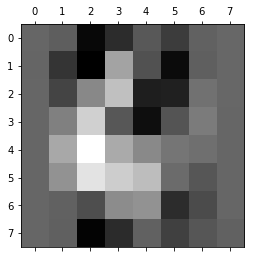

In [28]:
# TODO: reshape the first component and plot it as an image
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(digits.data)
# transform our data using the learned transform
digits2d = eigenbasis.transform(digits.data)
digits2d.shape

#print("principal components of digits data:\n", pca.components_)

mat = np.reshape(pca.components_[0], [8,8])
mat

plt.gray() # use gray levels rather than colors
plt.matshow(mat) 

<Figure size 432x288 with 0 Axes>

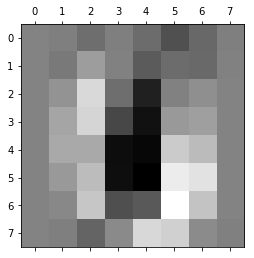

In [29]:
# TODO: reshape the second component and plot it as an image
mat2 = np.reshape(pca.components_[1], [8,8])
mat2

plt.gray() # use gray levels rather than colors
plt.matshow(mat2) 

# Applying ML techniques




In [30]:
# TODO: try applying several different classifiers to the digit classification problem,
#       then try again using PCA and keeping different numbers of components

from sklearn import datasets
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=3)

linearSvm = svm.SVC(kernel='rbf')
    # train and test
linearSvm.fit(X_train, y_train)
accuracy1 = linearSvm.score(X_test, y_test)
print('accuracy for linearSVM with rbf kernel: ', accuracy1)

treeclf = tree.DecisionTreeClassifier()
treeclf.fit(X_train, y_train)
accuracy2 = treeclf.score(X_test, y_test)
print('accuracy for decision trees: ', accuracy2)

rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
rf.predict(X_test)
accuracy3 = rf.score(X_test, y_test)
print('accuracy using randomforest:', accuracy3)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
nn.fit(X_train, y_train)
accuracy4 = nn.score(X_test, y_test)
print('accuracy using kNN:', accuracy4)

svmLinear = svm.SVC(kernel='linear')
svmLinear.fit(X_train, y_train)
accuracy5 = svmLinear.score(X_test, y_test)
print('accuracy for linearSVM with linear kernel: ', accuracy5)



/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.2948539638386648
accuracy for decision trees:  0.8386648122392212
accuracy using randomforest: 0.9707927677329624
accuracy using kNN: 0.9874826147426982
accuracy for linearSVM with linear kernel:  0.9694019471488178


Using PCA varying the number of features

In [31]:
powers2 = [2, 4, 8, 16, 32]

for i in range(len(powers2)):

    print('For n=', powers2[i], ' principal components, results : \n')
    
    pca = PCA(n_components = powers2[i])
    # actually run the fit algorithm
    eigenbasis = pca.fit(digits.data)
    # transform our data using the learned transform
    digits2d = eigenbasis.transform(digits.data)

    X_train, X_test, y_train, y_test = train_test_split(digits2d, digits.target, test_size=0.4, random_state=3)


    rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    rf.predict(X_test)
    accuracy3 = rf.score(X_test, y_test)
    print('accuracy using randomforest:', accuracy3)


    nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    nn.fit(X_train, y_train)
    accuracy4 = nn.score(X_test, y_test)
    print('accuracy using kNN:', accuracy4)


    treeclf = tree.DecisionTreeClassifier()
    treeclf.fit(X_train, y_train)
    accuracy2 = treeclf.score(X_test, y_test)
    print('accuracy for decision trees: ', accuracy2)


    svmLinear = svm.SVC(kernel='linear')
    svmLinear.fit(X_train, y_train)
    accuracy5 = svmLinear.score(X_test, y_test)
    print('accuracy for linearSVM with linear kernel: ', accuracy5)


    linearSvm = svm.SVC(kernel='rbf')
    linearSvm.fit(X_train, y_train)
    accuracy1 = linearSvm.score(X_test, y_test)
    print('accuracy for linearSVM with rbf kernel: ', accuracy1)
    
    print(' \n ----------------- -------------------- ------------------ \n')

For n= 2  principal components, results : 

accuracy using randomforest: 0.6397774687065368
accuracy using kNN: 0.5897079276773296
accuracy for decision trees:  0.5744089012517385
accuracy for linearSVM with linear kernel:  0.627260083449235


/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.6119610570236439
 
 ----------------- -------------------- ------------------ 

For n= 4  principal components, results : 

accuracy using randomforest: 0.8650904033379694
accuracy using kNN: 0.8525730180806675
accuracy for decision trees:  0.803894297635605
accuracy for linearSVM with linear kernel:  0.8317107093184979


/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.45897079276773295
 
 ----------------- -------------------- ------------------ 

For n= 8  principal components, results : 

accuracy using randomforest: 0.9457579972183588
accuracy using kNN: 0.9652294853963839
accuracy for decision trees:  0.8553546592489569
accuracy for linearSVM with linear kernel:  0.9040333796940194


/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.1599443671766342
 
 ----------------- -------------------- ------------------ 

For n= 16  principal components, results : 

accuracy using randomforest: 0.9554937413073713
accuracy using kNN: 0.9847009735744089
accuracy for decision trees:  0.8636995827538247
accuracy for linearSVM with linear kernel:  0.9596662030598053


/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.08762169680111266
 
 ----------------- -------------------- ------------------ 

For n= 32  principal components, results : 

accuracy using randomforest: 0.9554937413073713
accuracy using kNN: 0.9860917941585535
accuracy for decision trees:  0.8372739916550765
accuracy for linearSVM with linear kernel:  0.9735744089012517


/home/kratos/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy for linearSVM with rbf kernel:  0.0890125173852573
 
 ----------------- -------------------- ------------------ 

